Median gap us:  1795.0
Times of long gaps s:  [0.0044875 0.0633969 0.0991599 0.1531304 0.2074724 0.2614437 0.3155897
 0.3695601 0.4235334 0.4777024]
Durations of long gaps ms:  [55.144 54.094 51.141 53.073 51.13  52.897 51.139 51.176 53.137 51.224]
Count of long gaps ms:  10
Largest gaps ms:  55.144
num of points: 2477

Median gap us:  1795.0
Times of long gaps s:  [0.0044884 0.027973  0.0819381 0.1361063 0.1900859 0.2440607 0.2980221
 0.3519919 0.4061457 0.4603081]
Durations of long gaps ms:  [53.445 51.087 53.091 51.246 51.185 51.07  51.145 51.186 53.065 51.256]
Count of long gaps ms:  10
Largest gaps ms:  53.445
num of points: 2506

Median gap us:  1795.0
Times of long gaps s:  [0.004488  0.0159364 0.0699281 0.1239114 0.177915  0.2320994 0.2860955
 0.3401098 0.3941022 0.4481011]
Durations of long gaps ms:  [55.234 51.364 51.27  51.472 53.28  51.371 51.563 51.349 51.424 51.348]
Count of long gaps ms:  10
Largest gaps ms:  55.234
num of points: 2505



<Figure size 2500x2500 with 0 Axes>

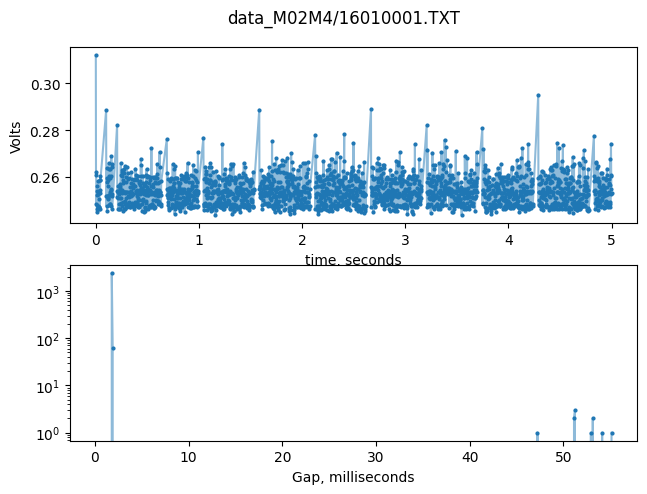

<Figure size 2500x2500 with 0 Axes>

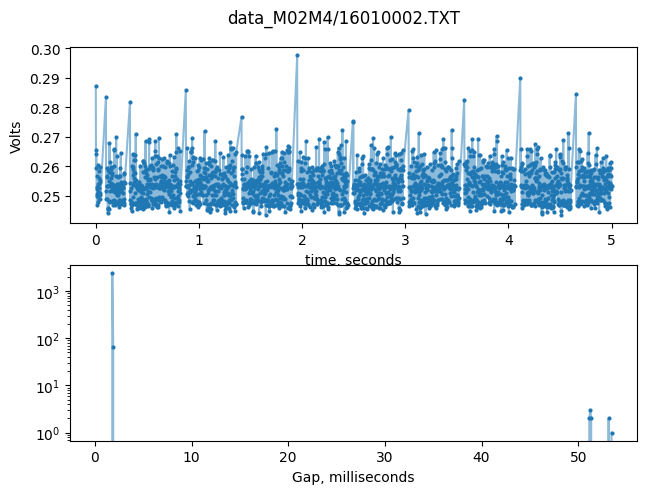

<Figure size 2500x2500 with 0 Axes>

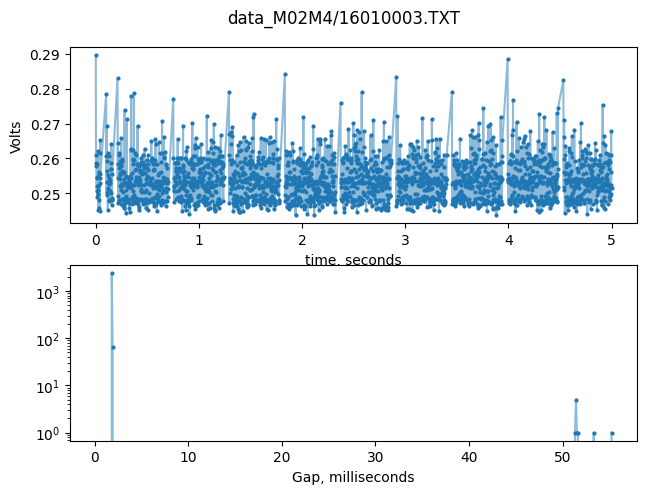

In [2]:
#import matplotlib
#matplotlib.use('TKAgg',force=True)

from matplotlib import pyplot as plt
import numpy as np
import pdb 
# %matplotlib widget 
# %matplotlib ipympl 
# %matplotlib nbagg 
# %matplotlib notebook 
# %matplotlib inline
# %matplotlib qt 
# %pylab qt
# %matplotlib

def quicklook(infile):
    #read data from file which is the input argument
    
    # t,v = np.loadtxt(infile,unpack=True,delimiter=',')
    t,v = np.loadtxt(infile,skiprows=5,unpack=True,delimiter=',')
    t = t - t[0]
    v = v*(3.3/4096)/10
    #Make a list of the time differences (gaps) beween adjacent points:
    dt = t - np.roll(t,1)
    dt = dt[1:]
    print('Median gap us: ',np.median(dt))
    h,tax = np.histogram(dt,range=[0,max(dt)],bins=int(max(dt)/100.))

    #print the times, durations,  and positions of the longest gaps:
    w = np.where(dt > 50000.)
    w=w[0]
    # print('Locations of long gaps: ',w)
    print('Times of long gaps s: ',t[w]/10e6)
    print('Durations of long gaps ms: ',dt[w]/1e3)
    print('Count of long gaps ms: ',len(dt[w]))
    print('Largest gaps ms: ',max(dt[w])/1e3)
    print('num of points:', len(v))


    #plot dataset
    plt.figure(num=None,figsize=(25,25) )
    fig, axs = plt.subplots(2)
    fig.tight_layout()
    fig.suptitle(infile)
    fig.subplots_adjust(top=.9)

    ts = t/1e6
    axs[0].scatter(ts,v,s=4)
    axs[0].plot(ts,v,alpha=0.5)
    axs[0].set_xlabel('time, seconds')
    axs[0].set_ylabel('Volts')
    #axs[0].set_xlim([min(ts),min(ts)+40])

    #plot histogram of gaps in milliseconds:
    axs[1].plot(tax[1:]/1e3,h,alpha=0.5)
    axs[1].scatter(tax[1:]/1e3,h,s=4)
    axs[1].set_yscale('log')
    axs[1].set_xlabel('Gap, milliseconds')
    # plt.show()




quicklook("data_M02M4/16010001.TXT") 
print('')
quicklook("data_M02M4/16010002.TXT") 
print('')
quicklook("data_M02M4/16010003.TXT") 
print('')
